![hackio](https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_celeste@4x.png?raw=true)


# Laboratorio A/B Testing No Paramétricos

**Aerolínea:** 
Alas del Mundo

**Descripción de la Aerolínea**

Alas del Mundo es una aerolínea internacional que opera una amplia red de rutas a nivel mundial. La compañía se enorgullece de ofrecer vuelos cómodos y asequibles a una variedad de destinos, atrayendo a una diversa gama de clientes.

**Objetivo del Análisis**

El objetivo de este ejercicio es determinar si existe una diferencia significativa en el número de vuelos reservados entre pasajeros con diferentes niveles educativos y si existe una diferencia significativa entre el género de sus clientes y su salario. La aerolínea desea entender mejor a sus clientes para poder personalizar sus campañas de marketing y mejorar sus estrategias de ventas.

**Set de datos**

El conjunto de datos *alas_del_mundo.csv* contiene información sobre clientes de la aerolínea Alas del Mundo. A continuación, tenemos una descripción de lo que nos podemos encontrar en el conjunto de datos:

- **Loyalty Number**: Número de registro de cada uno de los clientes.

- **Province**: Provincia de residencia del cliente.

- **City**: Ciudad de residencia del cliente.

- **Gender**: Género con el que se identifica el cliente.

- **Education**: Nivel educativo del cliente.

- **Salary**: Salario anual del cliente.

- **Loyalty Card**: Nivel que tiene el cliente dentro del programa de fidelización de la aerolínea.

- **CLV**: Valor total del cliente para la aerolínea a lo largo de toda su relación.

- **Enrollment Type**: Forma de registro del cliente a la aerolínea.

- **Enrollment Year**: Año de inscripción.

- **Enrollment Month**: Mes de inscripción. 

- **Year**: Año en el que se realizan los vuelos.

- **Month**: Mes en el que se realizan los vuelos.

- **Flights Booked**: Vuelos reservados por el cliente en un mes y año concretos.

- **Distance**: Distancia de vuelo del cliente en un mes y año concreto

- **Points Accumulated**: Puntos acumulados por el cliente en un mes y año concretos.

## Ejercicio 1:

Antes de realizar el experimento A/B y formular hipótesis, es fundamental comprender a fondo el conjunto de datos y sus características. Para lograr esto, debes llevar a cabo un análisis exploratorio detallado de los datos (EDA), con el fin de familiarizarte con ellos y entender la información disponible.



In [56]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st 
from scipy import stats  

from scipy.stats import skew,kurtosis 

In [57]:
df_alas_del_mundo=pd.read_csv('datos/alas_del_mundo.csv')

Procedemos con el EDA. En primer lugar sacamos información general sobre la estructura del archivo

In [58]:
df_alas_del_mundo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Loyalty Number      405624 non-null  int64  
 1   Province            405624 non-null  object 
 2   City                405624 non-null  object 
 3   Gender              405624 non-null  object 
 4   Education           405624 non-null  object 
 5   Salary              302952 non-null  float64
 6   Loyalty Card        405624 non-null  object 
 7   CLV                 405624 non-null  float64
 8   Enrollment Type     405624 non-null  object 
 9   Enrollment Year     405624 non-null  int64  
 10  Enrollment Month    405624 non-null  int64  
 11  Year                405624 non-null  int64  
 12  Month               405624 non-null  int64  
 13  Flights Booked      405624 non-null  int64  
 14  Distance            405624 non-null  int64  
 15  Points Accumulated  405624 non-nul

In [59]:
df_alas_del_mundo.describe()

,Loyalty Number,Salary,CLV,Enrollment Year,Enrollment Month,Year,Month,Flights Booked,Distance,Points Accumulated
count,405624.000000,302952.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000
mean,550037.873084,79268.825953,7991.976226,2015.252529,6.668008,2017.500000,6.500000,4.115052,1208.880059,123.692721
std,258935.286969,34992.133508,6863.663857,1.979427,3.399766,0.500001,3.452057,5.225518,1433.155320,146.599831
min,100018.000000,-58486.000000,1898.010000,2012.000000,1.000000,2017.000000,1.000000,0.000000,0.000000,0.000000
25%,326961.000000,59262.000000,3985.320000,2014.000000,4.000000,2017.000000,3.750000,0.000000,0.000000,0.000000
50%,550834.000000,73479.000000,5776.340000,2015.000000,7.000000,2017.500000,6.500000,1.000000,488.000000,50.000000
75%,772194.000000,88612.000000,8936.820000,2017.000000,10.000000,2018.000000,9.250000,8.000000,2336.000000,239.000000
max,999986.000000,407228.000000,83325.380000,2018.000000,12.000000,2018.000000,12.000000,21.000000,6293.000000,676.500000


La columna Salary tiene nulos y valores negativos. El resto parecen estar en orden y con tipos de datos coherentes a las categorías de datos

In [60]:
valores_nulos_salary = df_alas_del_mundo['Salary'].isnull().sum()

In [61]:
total_registros= df_alas_del_mundo.shape[0]
total_registros

405624

In [62]:
#Calculamos el porcentaje de nulos de la columna salario
porcentaje_nulos_salary = (valores_nulos_salary / total_registros) * 100
porcentaje_nulos_salary

np.float64(25.31211170936631)

Vamos a familiarizarnos con las distribuciones de nuestras columnas. Generamos visualizaciones

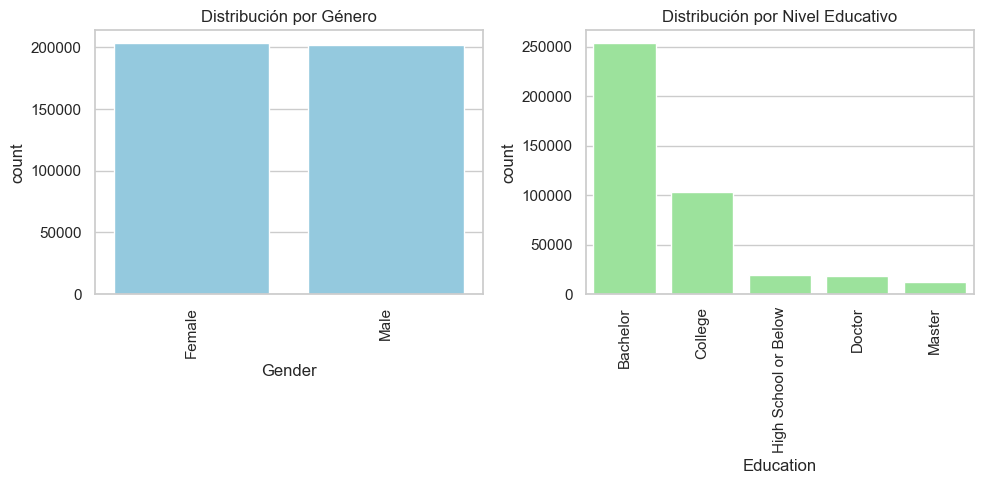

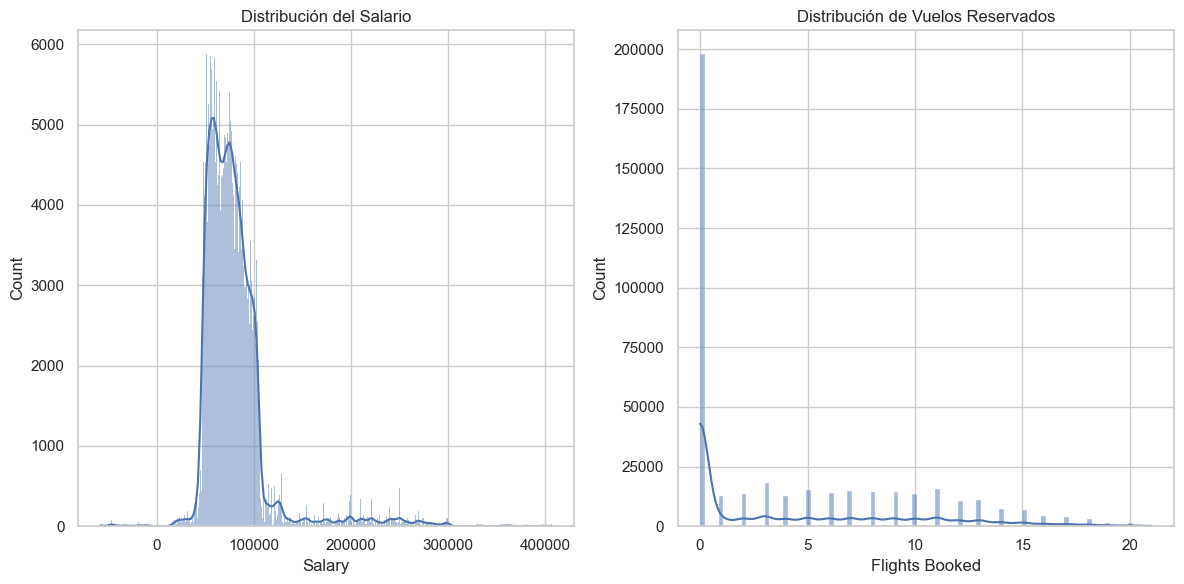

In [ ]:
# Configuración general para gráficos
sns.set(style="whitegrid")
#Definimos una funcion para las visualizaciones que analzian las distribuciones
def generar_visualizaciones(dataframe):
    plt.figure(figsize=(10, 5))
    
    graficos_categoricos = [
        {'columna': 'Gender', 'color': 'skyblue', 'titulo': 'Distribución por Género'},
        {'columna': 'Education', 'color': 'lightgreen', 'titulo': 'Distribución por Nivel Educativo', 'order': dataframe['Education'].value_counts().index}
    ]
    
    # Gráficos de distribución de variables categóricas
    for i, grafico in enumerate(graficos_categoricos, 1):
        plt.subplot(1, 2, i)
        sns.countplot(data=dataframe, x=grafico['columna'], color=grafico['color'], order=grafico.get('order'))
        plt.title(grafico['titulo'])
        plt.xticks(rotation=90)
    
    plt.tight_layout()
    plt.show()
    
    # Figura para gráficos de distribución de variables numéricas
    plt.figure(figsize=(12, 6))
    
    graficos_numericos = [
        {'columna': 'Salary', 'titulo': 'Distribución del Salario'},
        {'columna': 'Flights Booked', 'titulo': 'Distribución de Vuelos Reservados'}
    ]
    
    # Gráficos de distribución de variables numéricas
    for i, grafico in enumerate(graficos_numericos, 1):
        plt.subplot(1, 2, i)
        sns.histplot(dataframe[grafico['columna']].dropna(), kde=True)
        plt.title(grafico['titulo'])
    
    plt.tight_layout()
    plt.show()

# Llamada a la función
generar_visualizaciones(df_alas_del_mundo)


Las visualizaciones proporcionan información relevante sobre la composición y variabilidad en el conjunto de datos:

**Distribución por Género y Nivel Educativo:**

La mayoría de los clientes están equilibrados en cuanto al género.
Hay distintos niveles educativos, pero parece que algunos niveles tienen una mayor representación que otros, lo cual podría influir en los resultados del análisis A/B.

**Distribución del Salario:**

La distribución de los salarios muestra una inclinación hacia valores más bajos, con algunos valores extremos que indican un rango salarial amplio entre los clientes.

**Distribución de Vuelos Reservados:**

La mayoría de los clientes reservan pocos vuelos, pero también hay algunos que realizan un número considerable de reservas, sugiriendo que existen segmentos de clientes con patrones de reserva distintos.

## Ejercicio 2:
Determina si existe una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.

 Pasos a seguir:

   - Definición de la hipótesis.
   - Prueba de hipótesis
   - Análisis de resultados
   - Conclusiones
   


### Definición de hipótesis

**Hipótesis Nula (H₀):** No existe una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.


**Hipótesis Alternativa (H₁):** Existe una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.

Vamos a intentar verificar las condiciones de normalidad, y si alguna no se verifica ya sabemos que debemos optar por los test no parametricos para testar nuestra hipotesis nula

In [65]:
# Definimos una función para realizar la prueba de Kolmogorov-Smirnov
def prueba_normalidad_kolmogorov(dataframe, columna_grupo, columna_valor):
    resultados_normalidad = {}
    
    for nivel in dataframe[columna_grupo].unique():
        filtro_datos = dataframe[dataframe[columna_grupo] == nivel][columna_valor]
        
        estadistico, p_valor = stats.kstest(filtro_datos, 'norm', args=(filtro_datos.mean(), filtro_datos.std()))
        
        resultados_normalidad[nivel] = {"Estadístico de Kolmogorov-Smirnov": estadistico, "Valor p": p_valor}
    
    return pd.DataFrame(resultados_normalidad).T

resultados_normalidad_df = prueba_normalidad_kolmogorov(df_alas_del_mundo, 'Education', 'Flights Booked')

print("Resultados de la Prueba de Normalidad de Kolmogorov-Smirnov por Nivel Educativo:")
print(resultados_normalidad_df)


Resultados de la Prueba de Normalidad de Kolmogorov-Smirnov por Nivel Educativo:
                      Estadístico de Kolmogorov-Smirnov  Valor p
Bachelor                                       0.273970      0.0
College                                        0.271298      0.0
Master                                         0.266404      0.0
High School or Below                           0.267911      0.0
Doctor                                         0.270323      0.0


El p-valor nos da 0. Luego la condicion de normalidad no se cumple. Tenemos que usar test no parametricos.

Vamos a decidir cual de las pruebas no paramétricas debemos usar.

In [68]:
def crear_lista_grupos(df, columna_grupo, columna_metrica):

    lista_grupos = []

    for valor in df[columna_grupo].unique():

        datos_filtrados = df[df[columna_grupo] == valor][columna_metrica]
        lista_grupos.append(datos_filtrados)

    return lista_grupos




In [69]:

def elegir_test(datos, dependencia=False):

    if len(datos) > 2:
        print('Test Krusal Wallis')
        return stats.kruskal(*datos)

    elif len(datos) == 2 and dependencia:
        print('Wilcoxon')
        return stats.wilcoxon(*datos)

    elif len(datos) == 2 and not dependencia:
        print('Test U')
        return stats.mannwhitneyu(*datos)

    else:
        print('No hay test adecuado')

In [70]:
grupos=crear_lista_grupos(df_alas_del_mundo, 'Education', 'Flights Booked')

In [ ]:
test=elegir_test(grupos,False)

Test Krusal Wallis


In [75]:
(estadistico, p_valor)=test

In [76]:
print(f"El p_valor es {p_valor}")

El p_valor es 0.0012393337284342227


In [81]:
# Interpretación del resultado
if p_valor < 0.05:
    print("Existe una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.")
else:
    print("No se encontró una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.")

Existe una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.


In [88]:
vuelos_por_nivel_educativo = df_alas_del_mundo.groupby('Education')['Flights Booked'].describe()
vuelos_por_nivel_educativo



,count,mean,std,min,25%,50%,75%,max
Education,,,,,,,,
Bachelor,253752.0,4.091093,5.216995,0.0,0.0,1.0,8.0,21.0
College,102672.0,4.153012,5.242136,0.0,0.0,1.0,8.0,21.0
Doctor,17856.0,4.146281,5.250093,0.0,0.0,1.0,8.0,21.0
High School or Below,19008.0,4.155777,5.234551,0.0,0.0,1.0,8.0,21.0
Master,12336.0,4.184014,5.210294,0.0,0.0,1.0,8.0,21.0


Hacemos un box plot y de la distribucion en los diferenes gruos

C:\Users\Administrador\AppData\Local\Temp\ipykernel_17820\739253729.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_alas_del_mundo, x='Education', y='Flights Booked', palette="Set2", order=df_alas_del_mundo['Education'].value_counts().index)


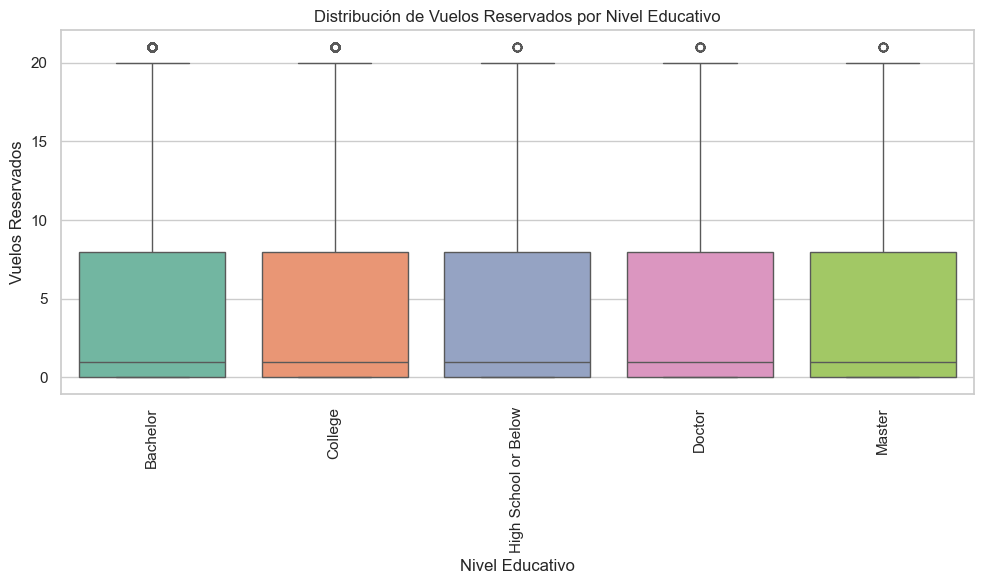

In [89]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

sns.boxplot(data=df_alas_del_mundo, x='Education', y='Flights Booked', palette="Set2", order=df_alas_del_mundo['Education'].value_counts().index)

plt.title("Distribución de Vuelos Reservados por Nivel Educativo")
plt.xlabel("Nivel Educativo")
plt.ylabel("Vuelos Reservados")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

A la luz de esta visualización y la tabla anterior, vemos que a pesar de los que nos decia el test, en la practica no existen diferencias. Una posible explciación puede ser una elevada variabildiad entre subgrupos a la que el test de Krusal Willis es sensible

Estudiamos la homoestaticidad

In [90]:
# Aplicamos el test de Bartlett usando los grupos generados por el groupby
statistic, p_valor = stats.levene(*grupos)

print(f"statistic = {statistic}, p_valor = {p_valor}")


statistic = 3.17197452620469, p_valor = 0.01290681079552744


Hay una elevada variabilidad entre grupos lo cual puede falsear los resultados del test. Si el objetivo es tomar decisiones prácticas, podríamos concluir que estas diferencias probablemente no justifican acciones diferenciadas para cada grupo educativo, ya que visualmente y en términos de estadísticos, los grupos son bastante similares.

## Ejercicio 3:
Determina si existe una diferencia significativa en el salario de los clientes en función del género de los mismos.

Pasos a seguir:
   - Definición de la hipótesis.
   - Prueba de hipótesis
   - Análisis de resultados
   - Conclusiones

**Hipótesis Nula (H₀):** No existe una diferencia significativa en el en el salario de los clientes en función del género de los mismos.

**Hipótesis Alternativa (H₁):** Existe una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.

De manera analoga al ejercicio anterior tratamos de probar los requerimientos de las pruebas parametricas y cua´dno nos falle tiraremos por un test no parametrico

Pero antes rellanamos los nulos de la columna Salary con la mediana

In [94]:
mediana_salary = df_alas_del_mundo['Salary'].median()
df_alas_del_mundo['Salary'].fillna(mediana_salary, inplace=True)


C:\Users\Administrador\AppData\Local\Temp\ipykernel_17820\208479724.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_alas_del_mundo['Salary'].fillna(mediana_salary, inplace=True)


In [95]:
#usamos la función definida en el ejercicio anterior para calcular la normaldiad
resultados_normalidad_df = prueba_normalidad_kolmogorov(df_alas_del_mundo, 'Gender', 'Salary')
resultados_normalidad_df

,Estadístico de Kolmogorov-Smirnov,Valor p
Female,0.182072,0.0
Male,0.196354,0.0


no hay normalidad a la vista de los resultados del test ks. Usamos las mismas funciones que en el apartado anterior para aplicar el test no parametrico mas adecuado

In [96]:
grupos=crear_lista_grupos(df_alas_del_mundo, 'Gender', 'Salary')

In [97]:
test=elegir_test(grupos,False)

Test U


In [98]:
(estadistico, p_valor)=test

In [99]:
print(f"El p_valor es {p_valor}")

El p_valor es 7.713448534158202e-06


El p-valor es muy pequeño por lo tanto se rechaza la hipotesis nula y hay evidencia estadistica significativa de que hay relación entre el genero y el sueldo. Veamos si en la práctica se aprecia

In [100]:
salario_por_genero = df_alas_del_mundo.groupby('Gender')['Salary'].describe()
salario_por_genero



,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,203640.0,77824.623453,29915.908323,-58486.0,64001.0,73479.0,83333.0,407228.0
Male,201984.0,77781.799192,30772.689275,-57297.0,63795.0,73479.0,82460.0,381124.0


Vemos diferencias sutiles pero apreciales en la desviación cuadrtica y en el maximo. Las distribuciones aunque parecidas no son iguales y en lso valores extremos hay más diferencia. VAmos a ahcer una visualización para ilustrarlo

C:\Users\Administrador\AppData\Local\Temp\ipykernel_17820\3842178864.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_alas_del_mundo, x='Gender', y='Salary', palette="Set2", order=df_alas_del_mundo['Gender'].value_counts().index)


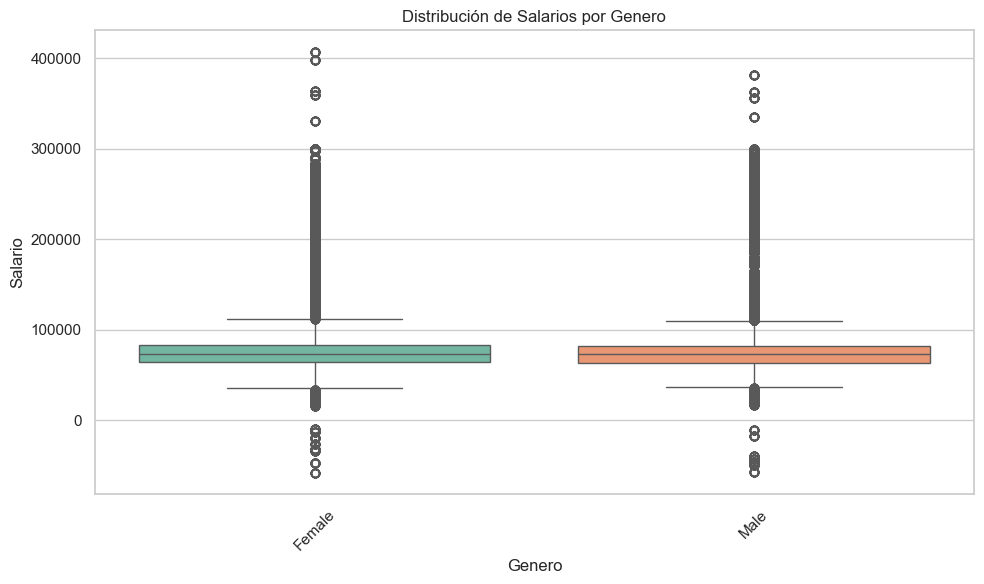

In [101]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

sns.boxplot(data=df_alas_del_mundo, x='Gender', y='Salary', palette="Set2", order=df_alas_del_mundo['Gender'].value_counts().index)

plt.title("Distribución de Salarios por Genero")
plt.xlabel("Genero")
plt.ylabel("Salario")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

La parte de la caja es casi identica, las diferencias las marcan los outliers que son más extremos en el caso de las mujeres 